# Example 1 of the "The GMT/MATLAB Toolbox" Wessel P & J. Luis. 
DOI 10.1002/2016GC006723

# Gridding

This example illustrates the gridding of ship track bathymetry near the Geologists seamounts southwest of Hawaii via robust, median-based averaging followed by gridding using a minimum curvature spline in tension algorithm. The following commands assume the data file, a simple (x y z) ascii file resides in current directory.
The result is visualized with the PyPlot backend of the Plots.jl package. While this is a simple example, we note that the blockmedian and surface combination powers the creation of many global data sets and that our gridding module surface is widely used across all sciences.

Read in the point data.

In [ ]:
using GMT
# Read in the point data.
geo = gmt("read -Td geologists.txt");

Now decimate data using median spatial averaging on a 1 arc min lattice

In [8]:
ave = gmt("blockmedian -R158:00W/156:40W/18:00N/19:40N -I1m", geo);

Grid the data using splines in tension

In [9]:
G = gmt("surface -R -I1m -T0.2", ave);

Plot the result with Plots

In [10]:
using Plots


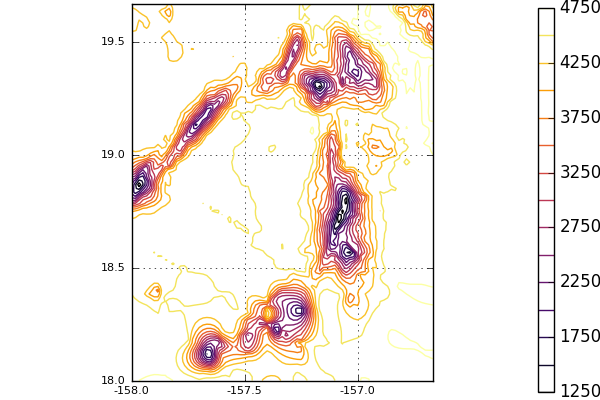

In [15]:
contour(G.x, G.y, G.z, aspect_ratio="equal")


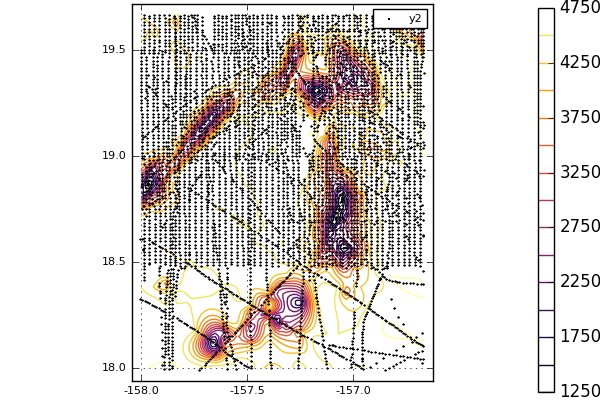

In [12]:
scatter!(ave[1].data[:,1], ave[1].data[:,2], markersize=0.5, marker=:cross)


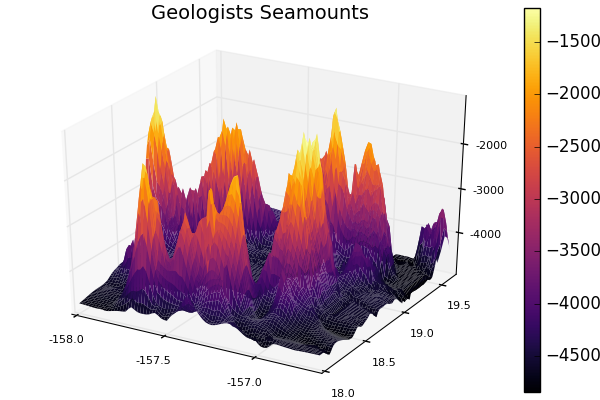

In [13]:
surface(G.x, G.y, -G.z, title="Geologists Seamounts")